Objetivo: Hacer y corregir este código de nuevo, para ver si funciona con lo que Artemio y Finkel me han dicho. 

In [1]:
from numpy import sqrt,log,cos,sin,pi,linspace
import math as mt
from random import random, seed, gauss
import matplotlib.pyplot as plt
import numpy as np


def gaussian(mu,sigma):
    r=sqrt(-2*sigma**2*log(1-random()))
    theta=2*pi*random()
    x=mu + r*cos(theta)
    y=mu + r*sin(theta)
    
    return x,y
#Esto te genera un par de numeros gaussianos con la media y el valor que quieras. Para un codigo, estaría chachi que te cogiese sólo de un tipo
#Tenemos que ver como queremos construir cada elemento de la matriz. No todos tendrán las mismas características.
#Para construir una matriz NxN en Python, cada término con un número aleatorio
import numpy as np
def matriceador(N,mu,sigma):
    A=np.empty((N,N))
    for i in range(N):
        for j in range(N):
            A[i,j]=gaussian(mu,sigma)[0]
    return A
#Te saca una matriz de numeros aleatorios con un determinado sigma y un determinado mu. Puedes elegir las características de la
#distribución de los numeros
def matriceador2(N,mu,sigma):
    A=np.empty((N,N),dtype=complex)
    for i in range(N):
        for k in range(N):
            v=gauss(mu,sigma)
            v2=gauss(mu,sigma)
            A[i,k]=complex(v)+complex(v2)*1j
    return A
def matriceador3(N,mu, sigma):   #Otro metodo para generar dos matrices aleatorias. Con un paquete random, y haciendo 2 mats
    A=np.empty((N,N),dtype=complex)
    B=np.empty((N,N),dtype=complex)
    for i in range(N):
        for k in range(N):
            v=gauss(mu,sigma)
            v2=gauss(mu,sigma)
            A[i,k]=complex(v)
            B[i,k]=complex(v2)
    return A,B

    
#Te saca una matriz de numeros aleatorios con distribución normal. Ambas comparten mismas características de distribución
#aunque la forma de cambiar esto ultimo es relativamente sencilla. Util para el caso unitario
def relfreq(v,e):
    v=list(v);v=sorted(v); j=v.index(e)
    x=[]; i=0; #print(j)
    while i<=j:
        x.append(v.count(v[i]))
        i=i+v.count(v[i])
        #print(i)
    return x
#Te saca la degeneración de cada sistema. Es, realmente, la función de probabilidad relativa de la distribución de autovalores 
def quadmean(x):
    x=np.array(x)
    s=np.sqrt(np.sum(x**2)/len(x))
    return s

def quadmeanmatrix(D):
    k=0
    f=[]
    while k<len(D):
        f.append(quadmean(D[k]))
        k=k+1
    k1=np.sum(f)/len(f); k2=quadmean(f)
    return k1, k2
def erf(x):
    k=0
    y=[]
    while k<len(x):
        y.append(mt.erf(x[k]))
        k=k+1
    y=np.array(y)
    return y


In [4]:
def PabloORTO(mu,sigma,N,L):  #N es la dimensión de la matriz, y L la longitud que quieras del vector
    M=[]
    i=0
    while i<L:
        A=matriceador(N,mu,sigma)
        M.append(1/2*(A+np.transpose(A))) #Generas la matriz ortogonal simetrizando
        i=i+1
    if L!=len(M):
        print("Algo está fallando en el codigo :(:(:(") #Por si las longitudes no cuadran!
    else:
        list(M)
        k=0
        Energias=[]
        EnergiasUnfolded=[]
        while k<L:
            ener,a=np.linalg.eig(M[k])  #Energías como autovalores del sistema. El a representa el error 
            Energias=Energias+list(ener)
            eta=[]
            adagga=sorted(ener) #Las energías ordenadas de menor a mayor. Más facil de analizar
            o=0
            while o<len(ener):
                if 1<abs((adagga[o]/np.sqrt(2*N))): #MUY IMPORTANTE. Te quita los valores que te dan error evaluados en la ley de Wigner
                    print("El autovalor de indice",o,"es mayor que 1 (En la matriz",k,"del vector matrices)")
                    o=o+1
                else:
                    eta.append(mt.asin(adagga[o]/np.sqrt(2*N))/pi+adagga[o]/(pi*np.sqrt(2*N))*np.sqrt(1-(adagga[o]/np.sqrt(2*N))**2)+1/2)
                    o=o+1 #Vector con el espectro unfolded
            eta=np.array(eta)
            s=[]
            for z in range(0,(len(eta)-1)):
                s.append((N-1)*(eta[z+1]-eta[z])/(eta[len(eta)-1]-eta[0]))  #Vector de espaciados normalizados
            EnergiasUnfolded=EnergiasUnfolded+list(s)
            k=k+1
    Energias=sorted(list(Energias))
    EnergiasUnfolded=sorted(list(EnergiasUnfolded))
    return Energias, EnergiasUnfolded

#El programa para el caso unitario

def PabloUNIT(mu,sigma,N,L):  #N es la dimensión de la matriz, y L la longitud que quieras del vector
    M=[]
    i=0
    while i<L:
        A,B=matriceador3(N,mu,sigma)
        M.append(1/2*(A+np.transpose(A)+1j*(B-np.transpose(B)))) #Aprovechas el hecho de que puedes adjuntar en Python
        i=i+1
    if L!=len(M):
        print("Algo está fallando en el codigo :(:(:(")
    else:
        k=0
        Energias=[]
        EnergiasUnfolded=[]
        while k<L:
            ener,a=np.linalg.eig(M[k])
            Energias=Energias+list(ener)
            eta=[]
            adagga=sorted(ener)
            o=0
            while o<len(ener):
                if 1<abs((adagga[o]/np.sqrt(4*N))):
                    print("El autovalor de indice",o,"es mayor que 1 (En la matriz",k,"del vector matrices)")
                    o=o+1
                else:
                    eta.append(mt.asin(adagga[o]/np.sqrt(4*N))/pi+adagga[o]/(2*pi*np.sqrt(N))*np.sqrt(1-(adagga[o]/np.sqrt(4*N))**2)+1/2)
                    o=o+1
            eta=np.array(eta)
            s=[]
            for z in range(0,(len(eta)-1)):
                s.append((N-1)*(eta[z+1]-eta[z])/(eta[len(eta)-1]-eta[0]))
            EnergiasUnfolded=EnergiasUnfolded+list(s)
            k=k+1
    Energias=sorted(list(Energias))
    EnergiasUnfolded=sorted(list(EnergiasUnfolded))
    return Energias, EnergiasUnfolded


In [ ]:
N=1000;  L=1; #N es la dimensión de la matriz, y L la cantidad de matrices de la muestra que se escogen
e,s,eta=PabloORTO(0,1,N,L)
x=np.linspace(e[0],e[len(e)-1],100)
y=(1/(N*pi))*sqrt(2*N-x**2)

fig, ax = plt.subplots(1, figsize=(15,10))
ax.hist(e,bins=50,color='midnightblue',density="True",histtype='step') #Unas 275 bins para una matriz de 10000, 90 bins para una de 1000
ax.plot(x,y,color='tomato')
ax.axes.xaxis.set_label_text('Energía')
ax.axes.yaxis.set_label_text('Densidad')
#fig.suptitle('Densidad de Autovalores (L=30) para 1000x1000. Ley del semicirculo')
plt.legend(['Densidad de autovalores', 'Ley del semicirculo'],loc=1, prop={'size':20})
plt.show()


sigma=[]
i=0
b=[]
while i<len(x):
    if 1<abs((x[i]/np.sqrt(2*N))):
        #print("El autovalor de indice",i,"es mayor que 1 (En la matriz",k,"del vector matrices)")
        i=i+1
    else:
        sigma.append(mt.asin(x[i]/np.sqrt(2*N))/pi+x[i]/(pi*np.sqrt(2*N))*np.sqrt(1-(x[i]/np.sqrt(2*N))**2)+1/2)
        b.append(x[i])
        i=i+1
fig, ax = plt.subplots(1, figsize=(15,10))
#ax.plot(adagga,np.cumsum(eunfold),linewidth=0.8)
ax.plot(b,sigma,color='tomato',linewidth=0.8)
ax.hist(e,bins=100,color='midnightblue',density='True',cumulative='True',histtype='step')
#fig.suptitle('Densidad acumulada de autovalores')
ax.axes.xaxis.set_label_text('Energía')
ax.axes.yaxis.set_label_text('Densidad')
plt.legend(['CDF', 'Densidad acumuluda'],
           loc=2, prop={'size':20})
plt.show()

sx=np.linspace(s[0],s[len(s)-1],10000)
ps=(pi/2)*sx*np.exp(-pi/4*sx**2)
fig, ax = plt.subplots(1, figsize=(15,10))
ax.hist(s,bins=70,color='midnightblue',density='True',histtype='step')
ax.plot(sx,ps,color='tomato')
ax.axes.xaxis.set_label_text('$\Delta$ Energía')
ax.axes.yaxis.set_label_text('Densidad')
#fig.suptitle('Ley de Wigner de autovalores contiguos')
plt.legend(['Espaciados de autovalores contiguos', 'Ley de Wigner'],loc=1, prop={'size':20})
plt.show()

aps=1-np.exp(-pi/4*sx**2)
fig, ax = plt.subplots(1, figsize=(15,10))
ax.hist(s,bins=100,color='midnightblue',density='True',cumulative='True',histtype='step')
ax.plot(sx,aps,color='tomato')
#fig.suptitle('Ley de Wigner de autovalores contiguos. Densidad Acumulada')
ax.axes.xaxis.set_label_text('$\Delta$E')
ax.axes.yaxis.set_label_text('Densidad')
plt.show()



C:\Users\pleon\AppData\Local\Temp\ipykernel_12672\3984784274.py:64: ComplexWarning: Casting complex values to real discards the imaginary part
  eta.append(mt.asin(adagga[o]/np.sqrt(4*N))/pi+adagga[o]/(2*pi*np.sqrt(N))*np.sqrt(1-(adagga[o]/np.sqrt(4*N))**2)+1/2)


El autovalor de indice 0 es mayor que 1 (En la matriz 6 del vector matrices)
El autovalor de indice 999 es mayor que 1 (En la matriz 6 del vector matrices)
El autovalor de indice 999 es mayor que 1 (En la matriz 12 del vector matrices)
El autovalor de indice 0 es mayor que 1 (En la matriz 20 del vector matrices)
El autovalor de indice 0 es mayor que 1 (En la matriz 22 del vector matrices)


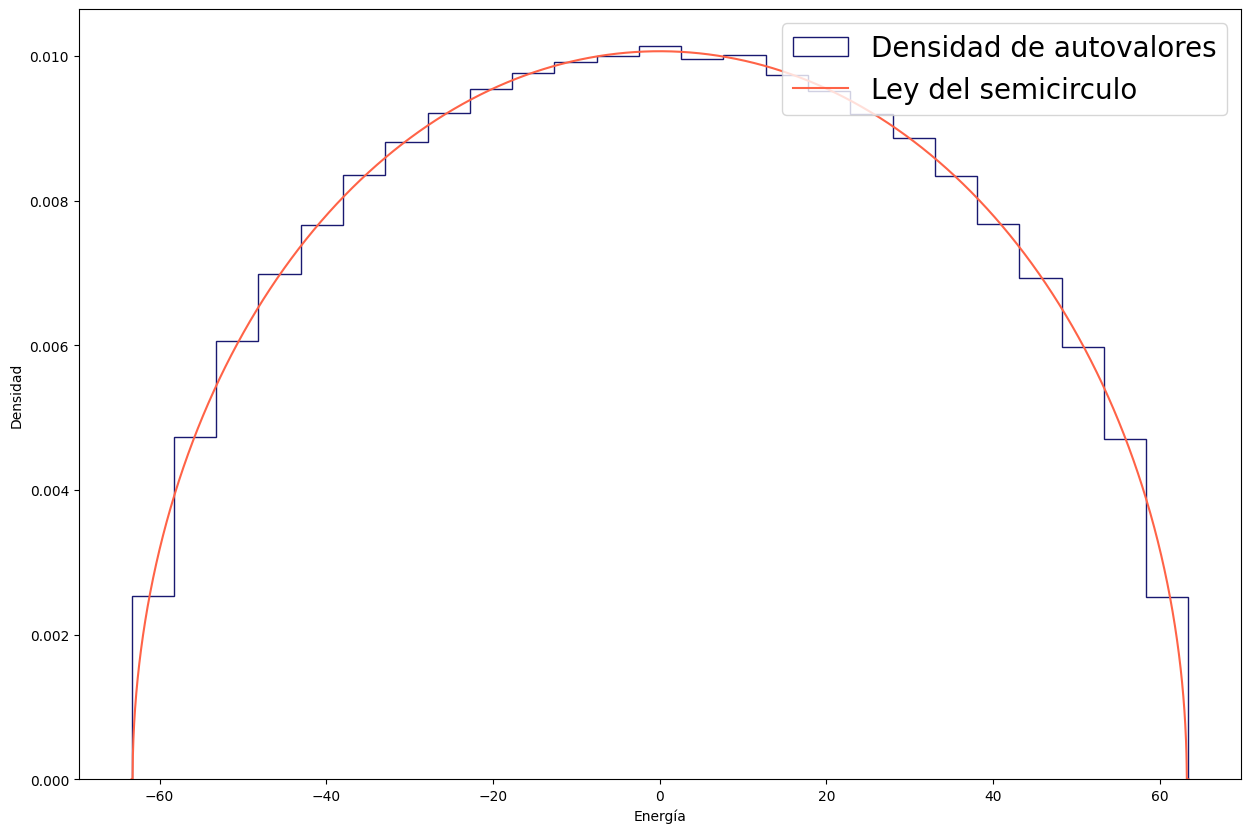

C:\Users\pleon\AppData\Local\Temp\ipykernel_12672\4225592390.py:24: ComplexWarning: Casting complex values to real discards the imaginary part
  sigma.append(mt.asin(x[i]/np.sqrt(4*N))/pi+x[i]/(2*pi*np.sqrt(N))*np.sqrt(1-(x[i]/np.sqrt(4*N))**2)+1/2)


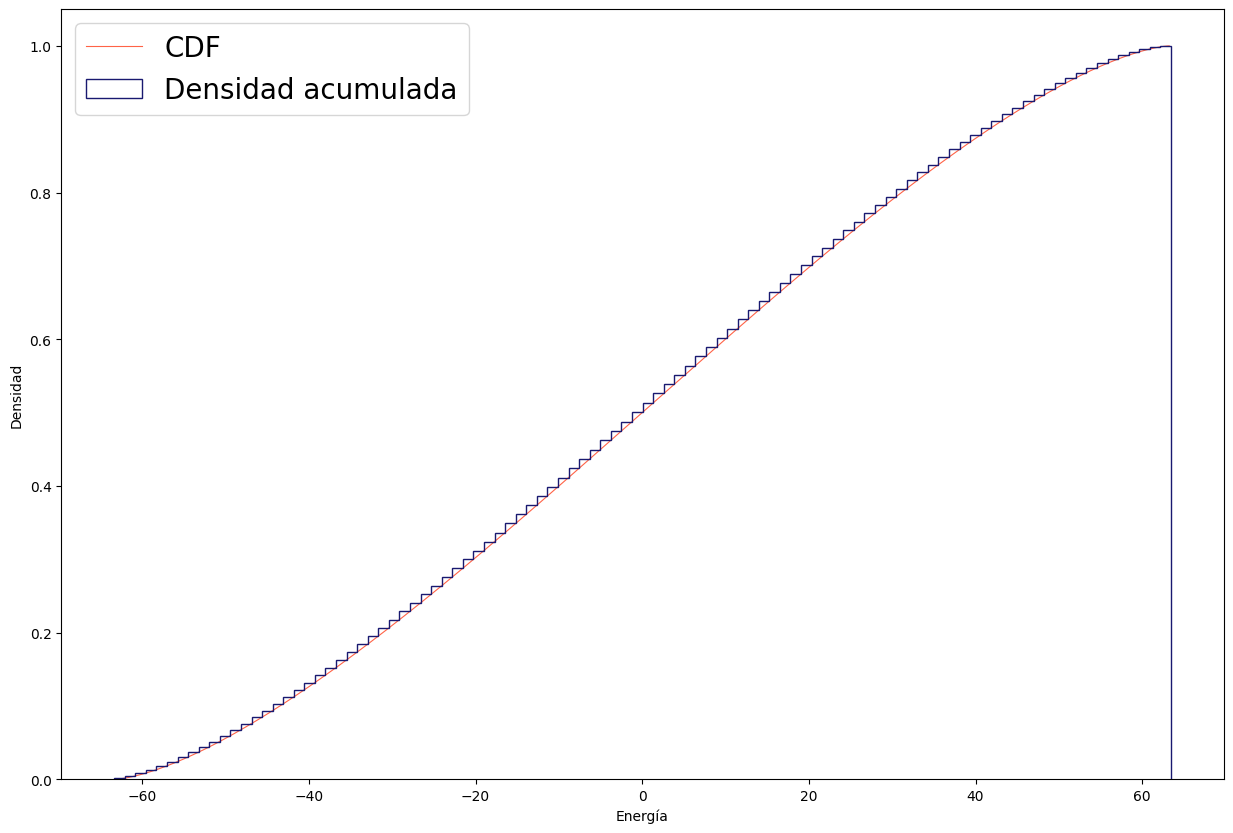

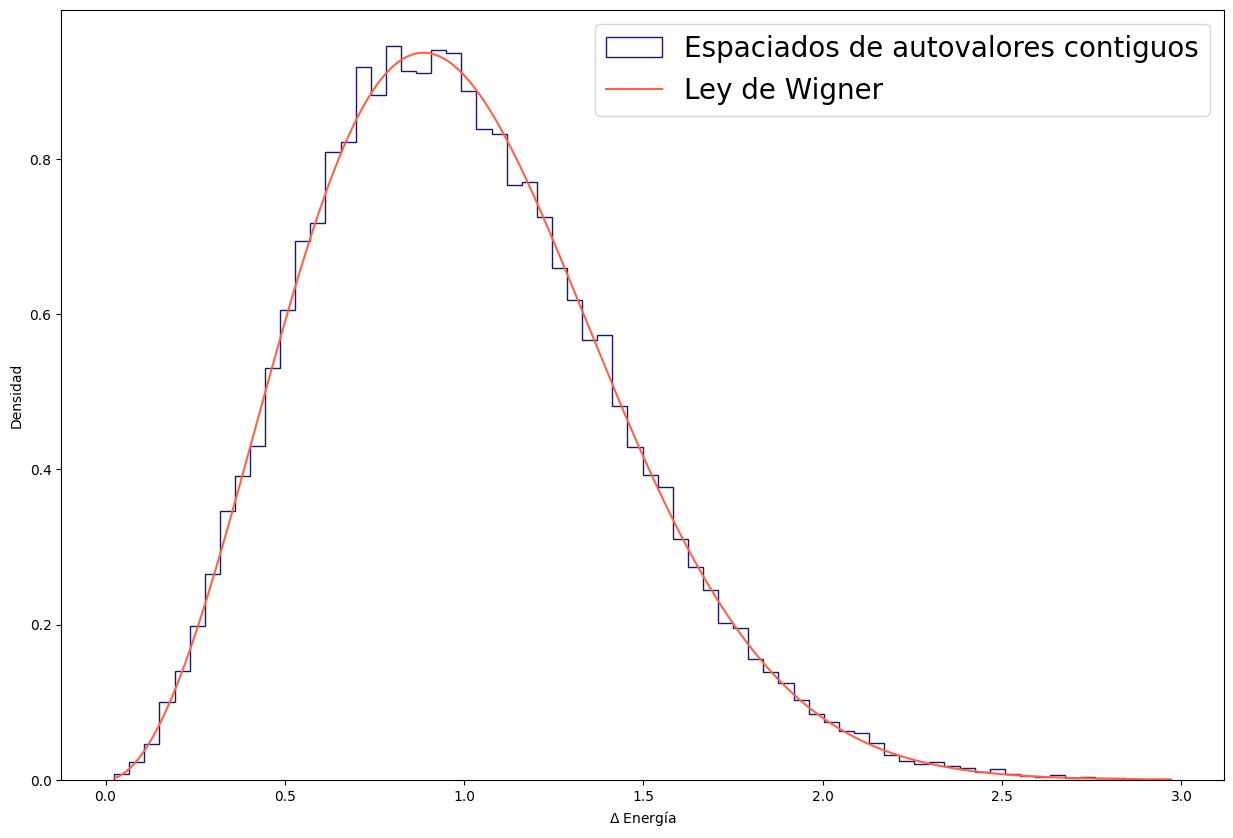

C:\Users\pleon\AppData\Local\Temp\ipykernel_12672\2438368331.py:75: ComplexWarning: Casting complex values to real discards the imaginary part
  y.append(mt.erf(x[k]))


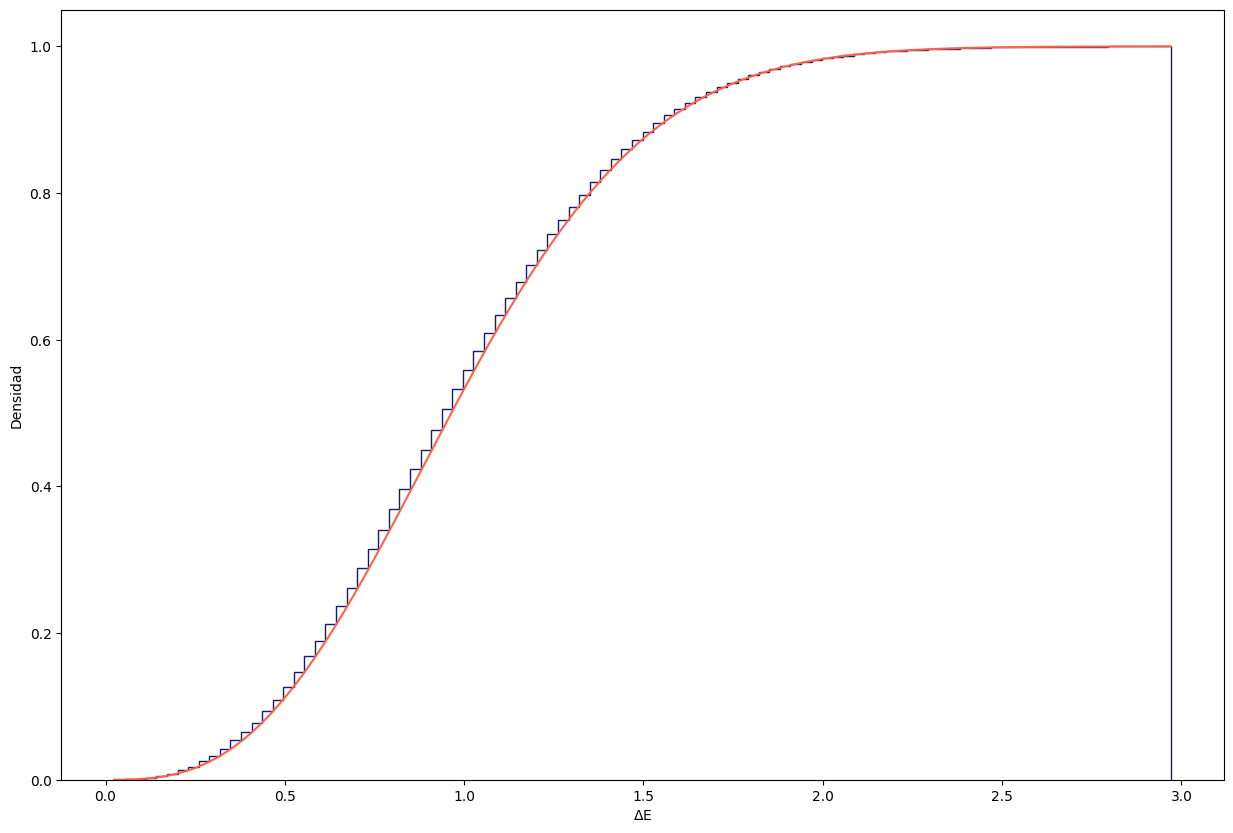

In [6]:
seed(125)
N=1000;  L=30  #N es la dimensión de la matriz, y L la cantidad de matrices de la muestra que se escogen
e2,s2=PabloUNIT(0,1,N,L)
x=np.linspace(e2[0],e2[len(e2)-1],10000)
y=(1/(2*N*pi))*sqrt(4*N-x**2)

fig, ax = plt.subplots(1, figsize=(15,10))
ax.hist(e2,bins=25,color='midnightblue',density="True",histtype='step') #Unas 275 bins para una matriz de 10000, 90 bins para una de 1000
ax.plot(x,y,color='tomato')
ax.axes.xaxis.set_label_text('Energía')
ax.axes.yaxis.set_label_text('Densidad')
#fig.suptitle('Densidad de Autovalores (L=30) para 1000x1000. Ley del semicirculo')
plt.legend(['Densidad de autovalores', 'Ley del semicirculo'],loc=1, prop={'size':20})
plt.show()

sigma=[]
i=0
b=[]
while i<len(x):
    if 1<abs((x[i]/np.sqrt(4*N))):
        #print("El autovalor de indice",i,"es mayor que 1 (En la matriz",k,"del vector matrices)")
        i=i+1
    else:
        sigma.append(mt.asin(x[i]/np.sqrt(4*N))/pi+x[i]/(2*pi*np.sqrt(N))*np.sqrt(1-(x[i]/np.sqrt(4*N))**2)+1/2)
        b.append(x[i])
        i=i+1
fig, ax = plt.subplots(1, figsize=(15,10))
#ax.plot(adagga,np.cumsum(eunfold),linewidth=0.8)
ax.plot(b,sigma,color='tomato',linewidth=0.8)
ax.hist(e2,bins=100,color='midnightblue',density='True',cumulative='True',histtype='step')
#fig.suptitle('Densidad acumulada de autovalores')
ax.axes.xaxis.set_label_text('Energía')
ax.axes.yaxis.set_label_text('Densidad')
plt.legend(['CDF' , 'Densidad acumulada'],
           loc=2, prop={'size':20})
plt.show()

sx=np.linspace(s2[0],s2[len(s2)-1],10000)
ps=(32/pi**2)*(sx**2)*np.exp(-4/pi*sx**2)
fig, ax = plt.subplots(1, figsize=(15,10))
ax.hist(s2,bins=70,color='midnightblue',density='True',histtype='step')
ax.plot(sx,ps,color='tomato')
ax.axes.xaxis.set_label_text('$\Delta$ Energía')
ax.axes.yaxis.set_label_text('Densidad')
#fig.suptitle('Ley de Wigner de autovalores contiguos')
plt.legend(['Espaciados de autovalores contiguos', 'Ley de Wigner'],loc=1, prop={'size':20})
plt.show()

aps= (np.exp(-4*sx**2/pi)/pi)*(pi*np.exp(4*sx**2/pi)*erf(2*sx/np.sqrt(pi))-4*sx)
fig, ax = plt.subplots(1, figsize=(15,10))
ax.hist(s2,bins=100,color='midnightblue',density='True',cumulative='True',histtype='step')
ax.plot(sx,aps,color='tomato')
#fig.suptitle('Ley de Wigner de autovalores contiguos. Densidad Acumulada')
ax.axes.xaxis.set_label_text('$\Delta$E')
ax.axes.yaxis.set_label_text('Densidad')
plt.show()
